## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.pyplot import *
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice in the DataFrame.
number_of_mice = len(df["Mouse ID"])
number_of_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice =df[df.duplicated(["Mouse ID", "Timepoint"],keep=False)]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
non_dup_df = df.drop_duplicates(["Mouse ID","Timepoint"])
non_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_non_dup_mice = len(non_dup_df["Mouse ID"])
number_non_dup_mice

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_sum = non_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sum()
tumor_mean = non_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_var = non_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = non_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = non_dup_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_summary_df = pd.DataFrame({"Tumor Sum":tumor_sum, "Tumor Mean":tumor_mean, "Tumor Variance":tumor_var,
                                   "Tumor Std": tumor_std, "Tumor SEM":tumor_sem})
tumor_vol_summary_df

,Tumor Sum,Tumor Mean,Tumor Variance,Tumor Std,Tumor SEM
Drug Regimen,,,,,
Capomulin,9355.420462,40.675741,24.947764,4.994774,0.329346
Ceftamin,9361.228582,52.591172,39.290177,6.268188,0.469821
Infubinol,9413.493529,52.884795,43.128684,6.567243,0.492236
Ketapril,10384.299876,55.235638,68.553577,8.279709,0.603860
Naftisol,10105.671026,54.331565,66.173479,8.134708,0.596466
Placebo,9780.078122,54.033581,61.168083,7.821003,0.581331
Propriva,8173.380288,52.393463,43.138803,6.568014,0.525862
Ramicane,9169.417875,40.216745,23.486704,4.846308,0.320955
Stelasyn,9816.199991,54.233149,59.450562,7.710419,0.573111


## Bar Plots

In [24]:
num_mice_per_timepoint = non_dup_df.groupby("Drug Regimen")[["Mouse ID"]].count()
num_mice_per_timepoint.sort_values(by=['Mouse ID'],ascending = False)
num_mice_per_timepoint = num_mice_per_timepoint.reset_index()
num_mice_per_timepoint

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


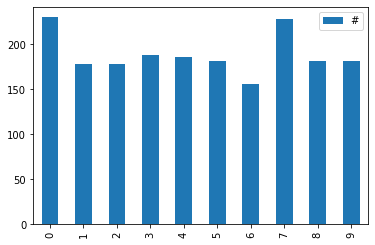

In [25]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
num_mice_per_timepoint.plot.bar()
legend("# of Mice")

<BarContainer object of 10 artists>

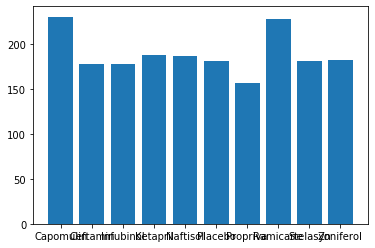

In [130]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(x=num_mice_per_timepoint['Drug Regimen'], height=num_mice_per_timepoint['Mouse ID'])

## Pie Plots

In [33]:
male_vs_female_df = non_dup_df.groupby("Sex")[["Mouse ID"]].count()
male_vs_female_df = male_vs_female_df.rename(columns= {"Mouse ID" : "# of Mice"})
male_vs_female_df = male_vs_female_df.reset_index()
male_vs_female_df

,Sex,# of Mice
0,Female,930
1,Male,958


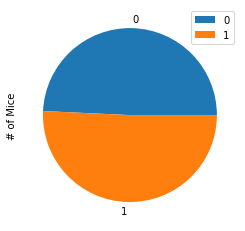

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_vs_female_df.plot.pie(y = '# of Mice')


([<matplotlib.patches.Wedge at 0x246cca64788>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')])

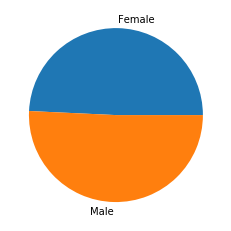

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(labels = male_vs_female_df['Sex'], x = male_vs_female_df['# of Mice'])

## Quartiles, Outliers and Boxplots

In [94]:
final_tumor_vol_df = non_dup_df.loc[non_dup_df['Timepoint'] == 45]
final_tumor_vol_df = final_tumor_vol_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].mean()
final_tumor_vol_df.sort_values(by=['Tumor Volume (mm3)'], inplace = True)
final_tumor_vol_df = final_tumor_vol_df.rename(columns= {'Tumor Volume (mm3)': 'Tumor Volume(mm3) at Day 45'})
final_tumor_vol_df

,Tumor Volume(mm3) at Day 45
Drug Regimen,
Ramicane,34.955595
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Zoniferol,65.960888
Propriva,66.258529
Placebo,68.084082
Stelasyn,68.438310
Naftisol,69.265506


In [127]:
dff = df.loc[df['Timepoint'] == 45]
ceftamin_df = dff.loc[df['Drug Regimen'] == "Ceftamin"]
infubinol_df = dff.loc[df['Drug Regimen'] == "Infubinol"]
ramicane_df = dff.loc[df['Drug Regimen'] == "Ramicane"]
capomulin_df = dff.loc[df['Drug Regimen'] == "Capomulin"]
infubinol_df = infubinol_df.reset_index()
ceftamin_df = ceftamin_df.reset_index()
ramicane_df = ramicane_df.reset_index()
capomulin_df = capomulin_df.reset_index()
capomulin_df
ceftamin_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3
5,1162,l733,Ceftamin,Female,4,30,45,64.299830,1
6,1260,o287,Ceftamin,Male,2,28,45,59.741901,4
7,1379,p438,Ceftamin,Female,11,26,45,61.433892,1
8,1670,w151,Ceftamin,Male,24,25,45,67.527482,3
9,1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [126]:
four_drug_df = pd.DataFrame({"Ceftamin Tumor Vol.":ceftamin_df["Tumor Volume (mm3)"], 
                             "Infubinol Tumor Vol.": infubinol_df["Tumor Volume (mm3)"],
                             "Ramicane Tumor Vol.": ramicane_df["Tumor Volume (mm3)"],
                             "Capomulin Tumor Vol.": capomulin_df["Tumor Volume (mm3)"]})
four_drug_df

,Ceftamin Tumor Vol.,Infubinol Tumor Vol.,Ramicane Tumor Vol.,Capomulin Tumor Vol.
0,62.999356,67.973419,22.050126,23.343598
1,61.849023,65.525743,29.128472,28.484033
2,68.923185,66.083066,30.276232,28.430964
3,67.748662,72.226731,30.564625,31.023923
4,59.851956,62.435404,30.638696,31.896238
5,64.299830,60.918767,31.560470,32.377357
6,59.741901,66.196912,31.095335,33.329098
7,61.433892,67.685569,33.397653,34.455298
8,67.527482,62.754451,32.978522,37.311846
9,64.634949,NaN,33.562402,36.041047


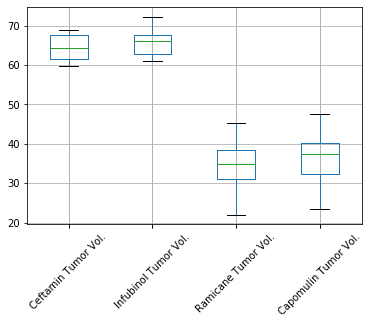

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_drug_df.boxplot(column = ['Ceftamin Tumor Vol.', 'Infubinol Tumor Vol.', 'Ramicane Tumor Vol.', 'Capomulin Tumor Vol.'])
four_drug_df.boxplot(rot=45, fontsize=10)

In [133]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = four_drug_df['Ceftamin Tumor Vol.'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumor Vol. is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumor Vol. is: {upperq}")
print(f"The interquartile range of Ceftamin Tumor Vol. is: {iqr}")
print(f"The the median of Ceftamin Tumor Vol. is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumor Vol. is: 61.43389223
The upper quartile of Ceftamin Tumor Vol. is: 67.52748237
The interquartile range of Ceftamin Tumor Vol. is: 6.093590140000003
The the median of Ceftamin Tumor Vol. is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [134]:
quartiles = four_drug_df['Infubinol Tumor Vol.'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumor Vol. is: {lowerq}")
print(f"The upper quartile of Infubinol Tumor Vol. is: {upperq}")
print(f"The interquartile range of Infubinol Tumor Vol. is: {iqr}")
print(f"The the median of Infubinol Tumor Vol. is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumor Vol. is: 62.75445141
The upper quartile of Infubinol Tumor Vol. is: 67.68556862
The interquartile range of Infubinol Tumor Vol. is: 4.9311172099999965
The the median of Infubinol Tumor Vol. is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [136]:
quartiles = four_drug_df['Ramicane Tumor Vol.'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumor Vol. is: {lowerq}")
print(f"The upper quartile of Ramicane Tumor Vol. is: {upperq}")
print(f"The interquartile range of Ramicane Tumor Vol. is: {iqr}")
print(f"The the median of Ramicane Tumor Vol. is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane Tumor Vol. is: 30.981175224999998
The upper quartile of Ramicane Tumor Vol. is: 38.508305307499995
The interquartile range of Ramicane Tumor Vol. is: 7.527130082499998
The the median of Ramicane Tumor Vol. is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [135]:
quartiles = four_drug_df['Capomulin Tumor Vol.'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor Vol. is: {lowerq}")
print(f"The upper quartile of Capomulin Tumor Vol. is: {upperq}")
print(f"The interquartile range of Capomulin Tumor Vol. is: {iqr}")
print(f"The the median of Capomulin Tumor Vol. is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumor Vol. is: 32.37735684
The upper quartile of Capomulin Tumor Vol. is: 40.1592203
The interquartile range of Capomulin Tumor Vol. is: 7.781863460000004
The the median of Capomulin Tumor Vol. is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


## Line and Scatter Plots

In [54]:
capomulin_df = non_dup_df.loc[non_dup_df['Drug Regimen'] == 'Capomulin']
capomulin_df
time_vs_tumor_df = capomulin_df.groupby(["Timepoint"])[["Tumor Volume (mm3)"]].mean()
time_vs_tumor_df = time_vs_tumor_df.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume(mm3) with Capomulin"})
time_vs_tumor_df

,Tumor Volume(mm3) with Capomulin
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325
25,39.939528
30,38.769339
35,37.816839
40,36.958001


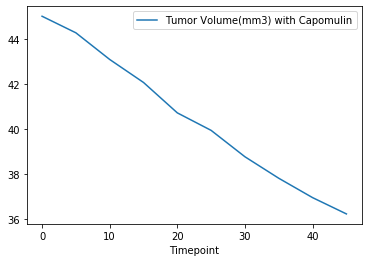

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumor_df.plot.line()

In [60]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_vs_tumor_df = capomulin_df.groupby(["Weight (g)"])[["Tumor Volume (mm3)"]].mean()
weight_vs_tumor_df = weight_vs_tumor_df.reset_index()
weight_vs_tumor_df


,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


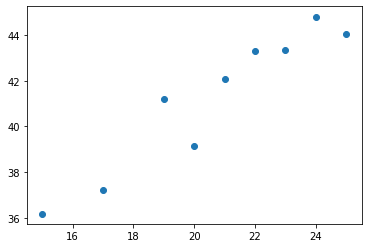

In [69]:
plt.scatter(x= weight_vs_tumor_df['Weight (g)'], y= weight_vs_tumor_df['Tumor Volume (mm3)'])

## Correlation and Regression

Text(16, 44, 'y = 0.89x + 22.76')

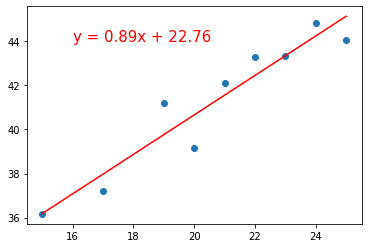

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_vs_tumor_df['Weight (g)']
y_values = weight_vs_tumor_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")